In [100]:
#Loading in the necessary libraries
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(GGally)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [54]:
#Reading in the "adult.data.txt" file
adult_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", delim=",",col_names=c("age", "workclass", "fnl_wgt","education",
    "education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss",
    "hrs_per_week","native_country","label"))

head(adult_data)

Parsed with column specification:
cols(
  age = col_double(),
  workclass = col_character(),
  fnl_wgt = col_character(),
  education = col_character(),
  education_num = col_character(),
  marital_status = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  capital_gain = col_character(),
  capital_loss = col_character(),
  hrs_per_week = col_character(),
  native_country = col_character(),
  label = col_character()
)



age,workclass,fnl_wgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,label
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [55]:
## Cleaning and Wrangling
adult_tidy <- adult_data %>%
    mutate(label=as_factor(label), capital_gain = as.numeric(capital_gain), 
           capital_loss = as.numeric(capital_loss), hrs_per_week = as.numeric(hrs_per_week) ) %>%
    filter_all(all_vars(. != " ?")) %>%
    select(age,capital_gain,capital_loss,hrs_per_week,label)

head(adult_tidy)

adult_summary <- adult_tidy %>%
    group_by(label) %>%
    summarize(n = n())
adult_summary
## Talk about class imbalance in the recipe

age,capital_gain,capital_loss,hrs_per_week,label
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
39,2174,0,40,<=50K
50,0,0,13,<=50K
38,0,0,40,<=50K
53,0,0,40,<=50K
28,0,0,40,<=50K
37,0,0,40,<=50K


`summarise()` ungrouping output (override with `.groups` argument)



label,n
<fct>,<int>
<=50K,22654
>50K,7508


`summarise()` ungrouping output (override with `.groups` argument)



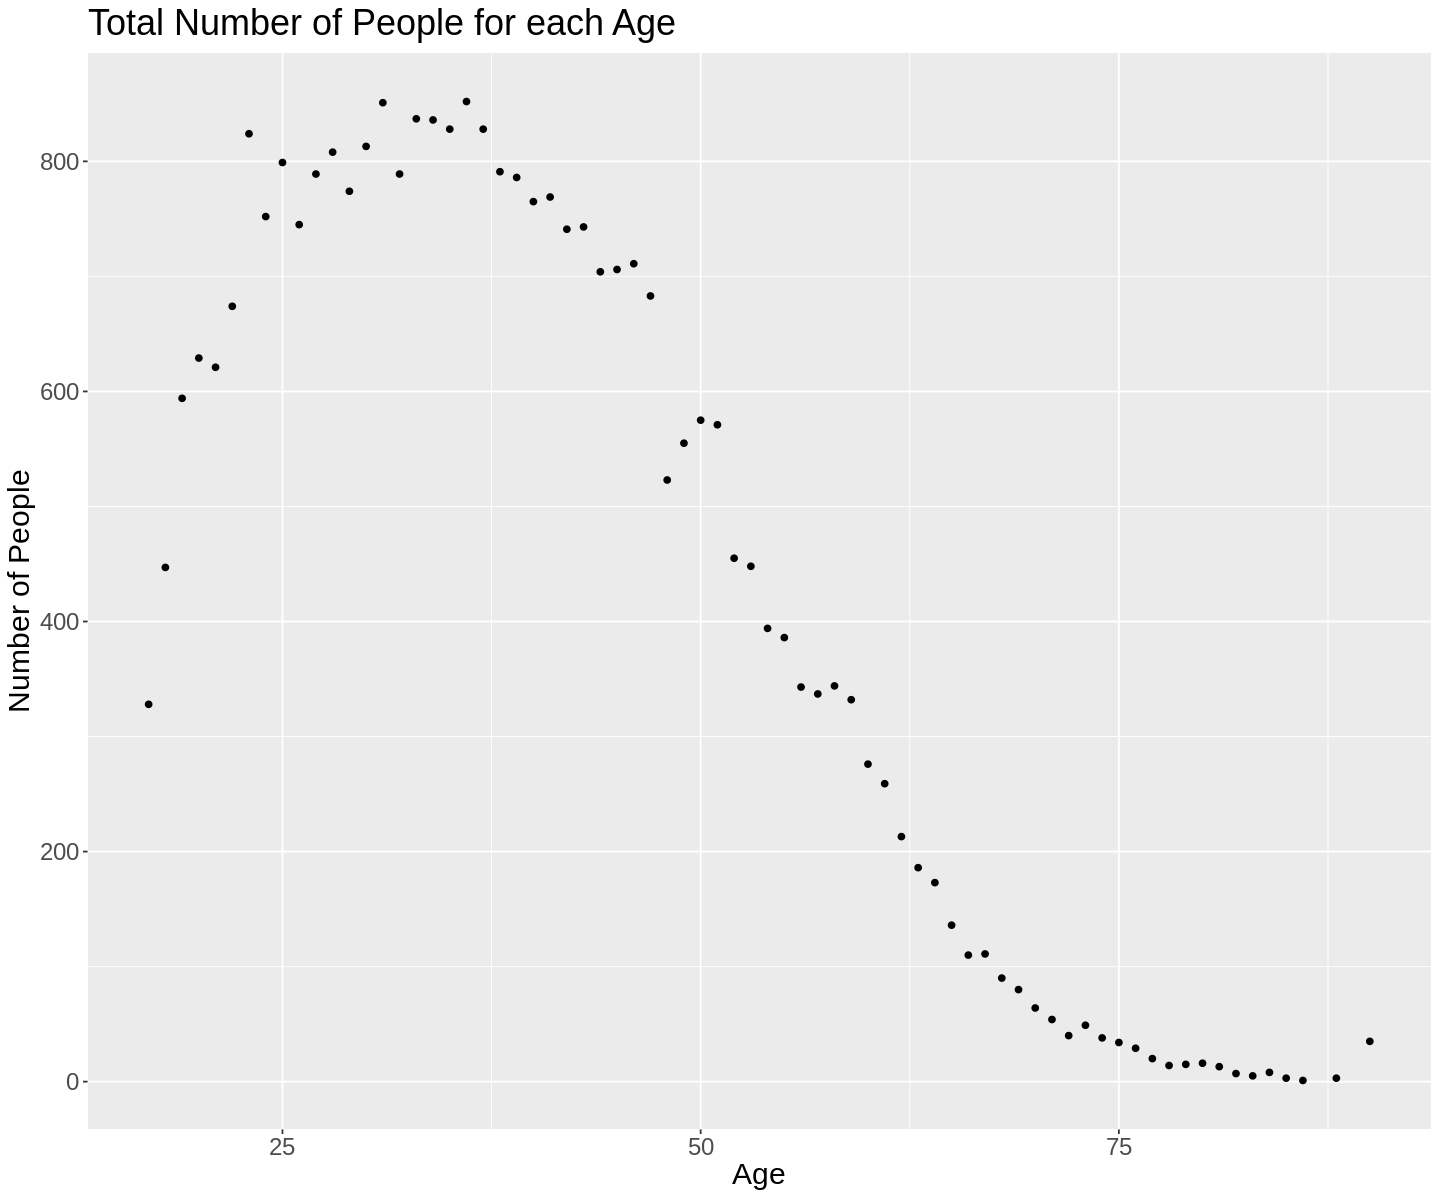

In [56]:
age_distribution <- adult_tidy %>%
    group_by(age) %>%
    summarize(n = n())

options(repr.plot.width = 12, repr.plot.height = 10)
adult_age_distribution <- age_distribution %>%
ggplot(aes(x = age, y = n)) + 
    geom_point() +
    labs(x = "Age", y = "Number of People") +
    ggtitle("Total Number of People for each Age") +
    theme(text = element_text(size = 18))

adult_age_distribution

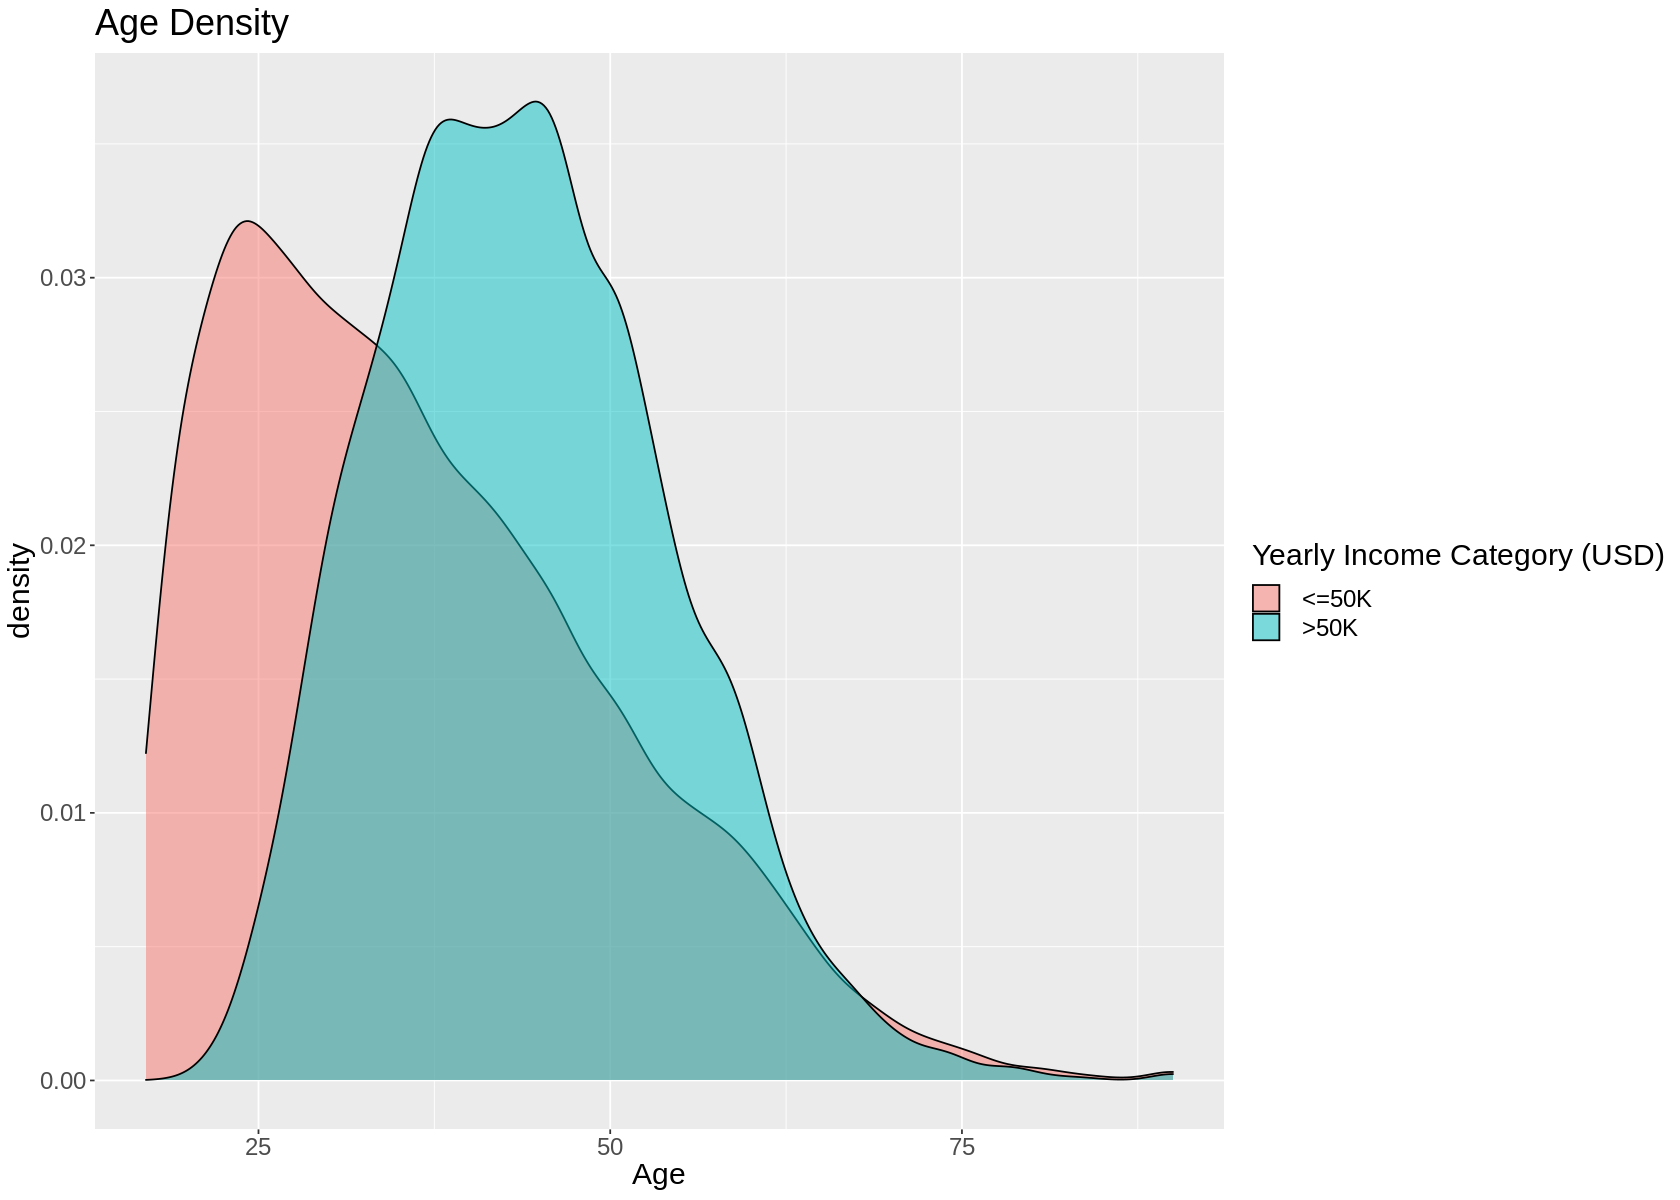

In [87]:
options(repr.plot.width = 14, repr.plot.height = 10)
adult_age_density <- adult_tidy %>%
ggplot(aes(x = age, fill = label)) + 
    geom_density(alpha = 0.5) +
    labs(x = "Age", fill = "Yearly Income Category (USD)") +
    ggtitle("Age Density") +
    theme(text = element_text(size = 18))
adult_age_density

In [118]:
adult_cg_label <- adult_tidy %>%
ggplot(aes(x = label, y = capital_gain)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category (USD)", y = "Capital Gains (USD)") +
    ggtitle("Yearly Income Category versus Capital Gains") +
    theme(text = element_text(size = 22))

In [112]:
adult_capital_gains <- adult_tidy %>%
    filter(capital_gain > 0) %>%
    group_by(label) %>%
    summarize(n = n())

adult_bar_chart <- adult_capital_gains %>%
ggplot(aes(x = label, y = n)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Number of People with Capital Gains") +
    ggtitle("Number of People with Capital Gains in each Yearly Income Category") +
    theme(text = element_text(size = 22))

`summarise()` ungrouping output (override with `.groups` argument)



In [114]:
adult_average_cg <- adult_tidy %>%
    filter(capital_gain > 0) %>%
    group_by(label) %>%
    summarize(average_cg = mean(capital_gain))

`summarise()` ungrouping output (override with `.groups` argument)



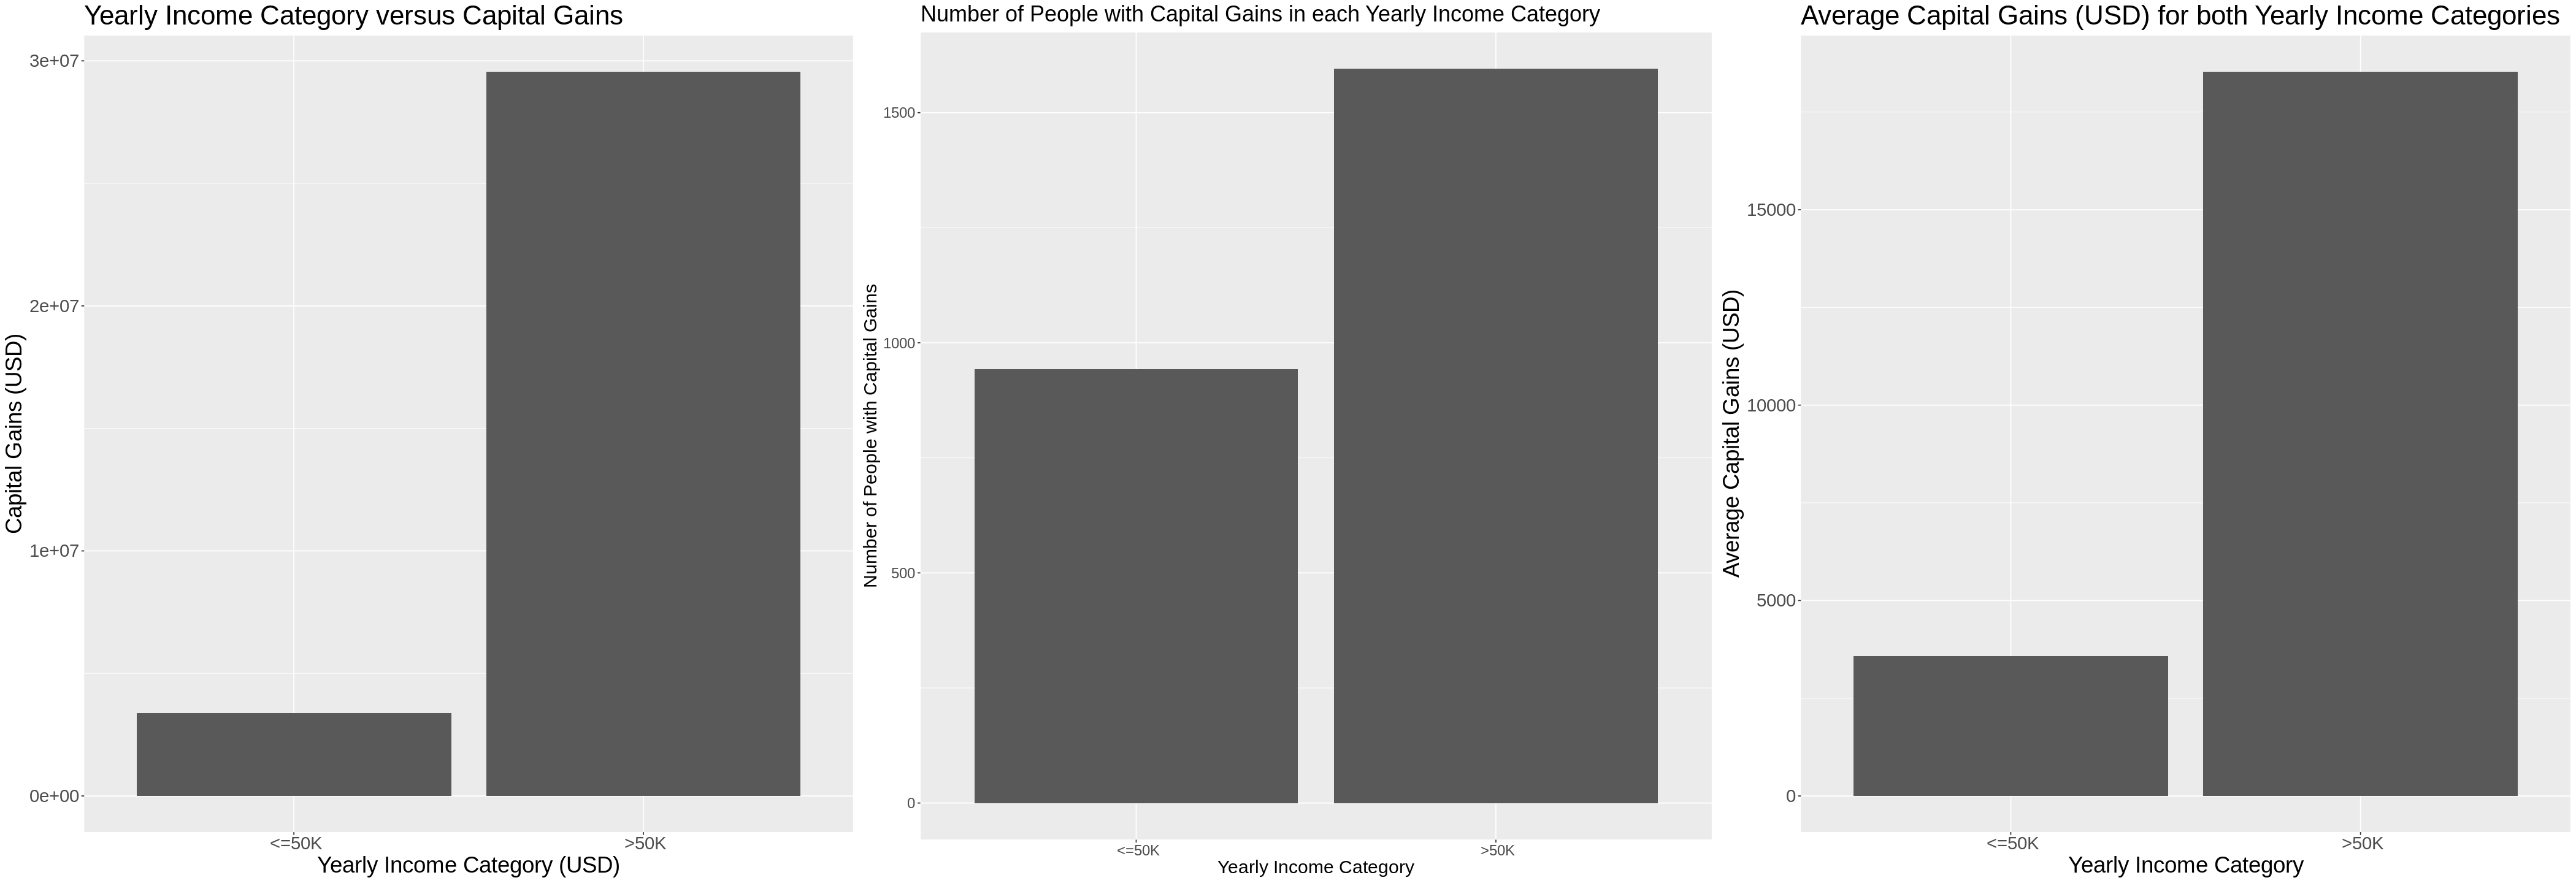

In [134]:
options(repr.plot.width = 35, repr.plot.height = 12)
adult_bar_chart_1 <- adult_average_cg %>%
ggplot(aes(x = label, y = average_cg)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Capital Gains (USD)") +
    ggtitle("Average Capital Gains (USD) for both Yearly Income Categories") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cg_label, adult_bar_chart, adult_bar_chart_1, ncol=3)

In [130]:
adult_cl_label <- adult_tidy %>%
ggplot(aes(x = label, y = capital_loss)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category (USD)", y = "Capital Losses (USD)") +
    ggtitle("Yearly Income Category versus Capital Losses") +
    theme(text = element_text(size = 22))

In [129]:
adult_capital_loss <- adult_tidy %>%
    filter(capital_loss > 0) %>%
    group_by(label) %>%
    summarize(n = n())

adult_cl_bar <- adult_capital_loss %>%
ggplot(aes(x = label, y = n)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Number of People with Capital Losses") +
    ggtitle("Number of People with Capital Losses in each Yearly Income Category") +
    theme(text = element_text(size = 22))

`summarise()` ungrouping output (override with `.groups` argument)



`summarise()` ungrouping output (override with `.groups` argument)



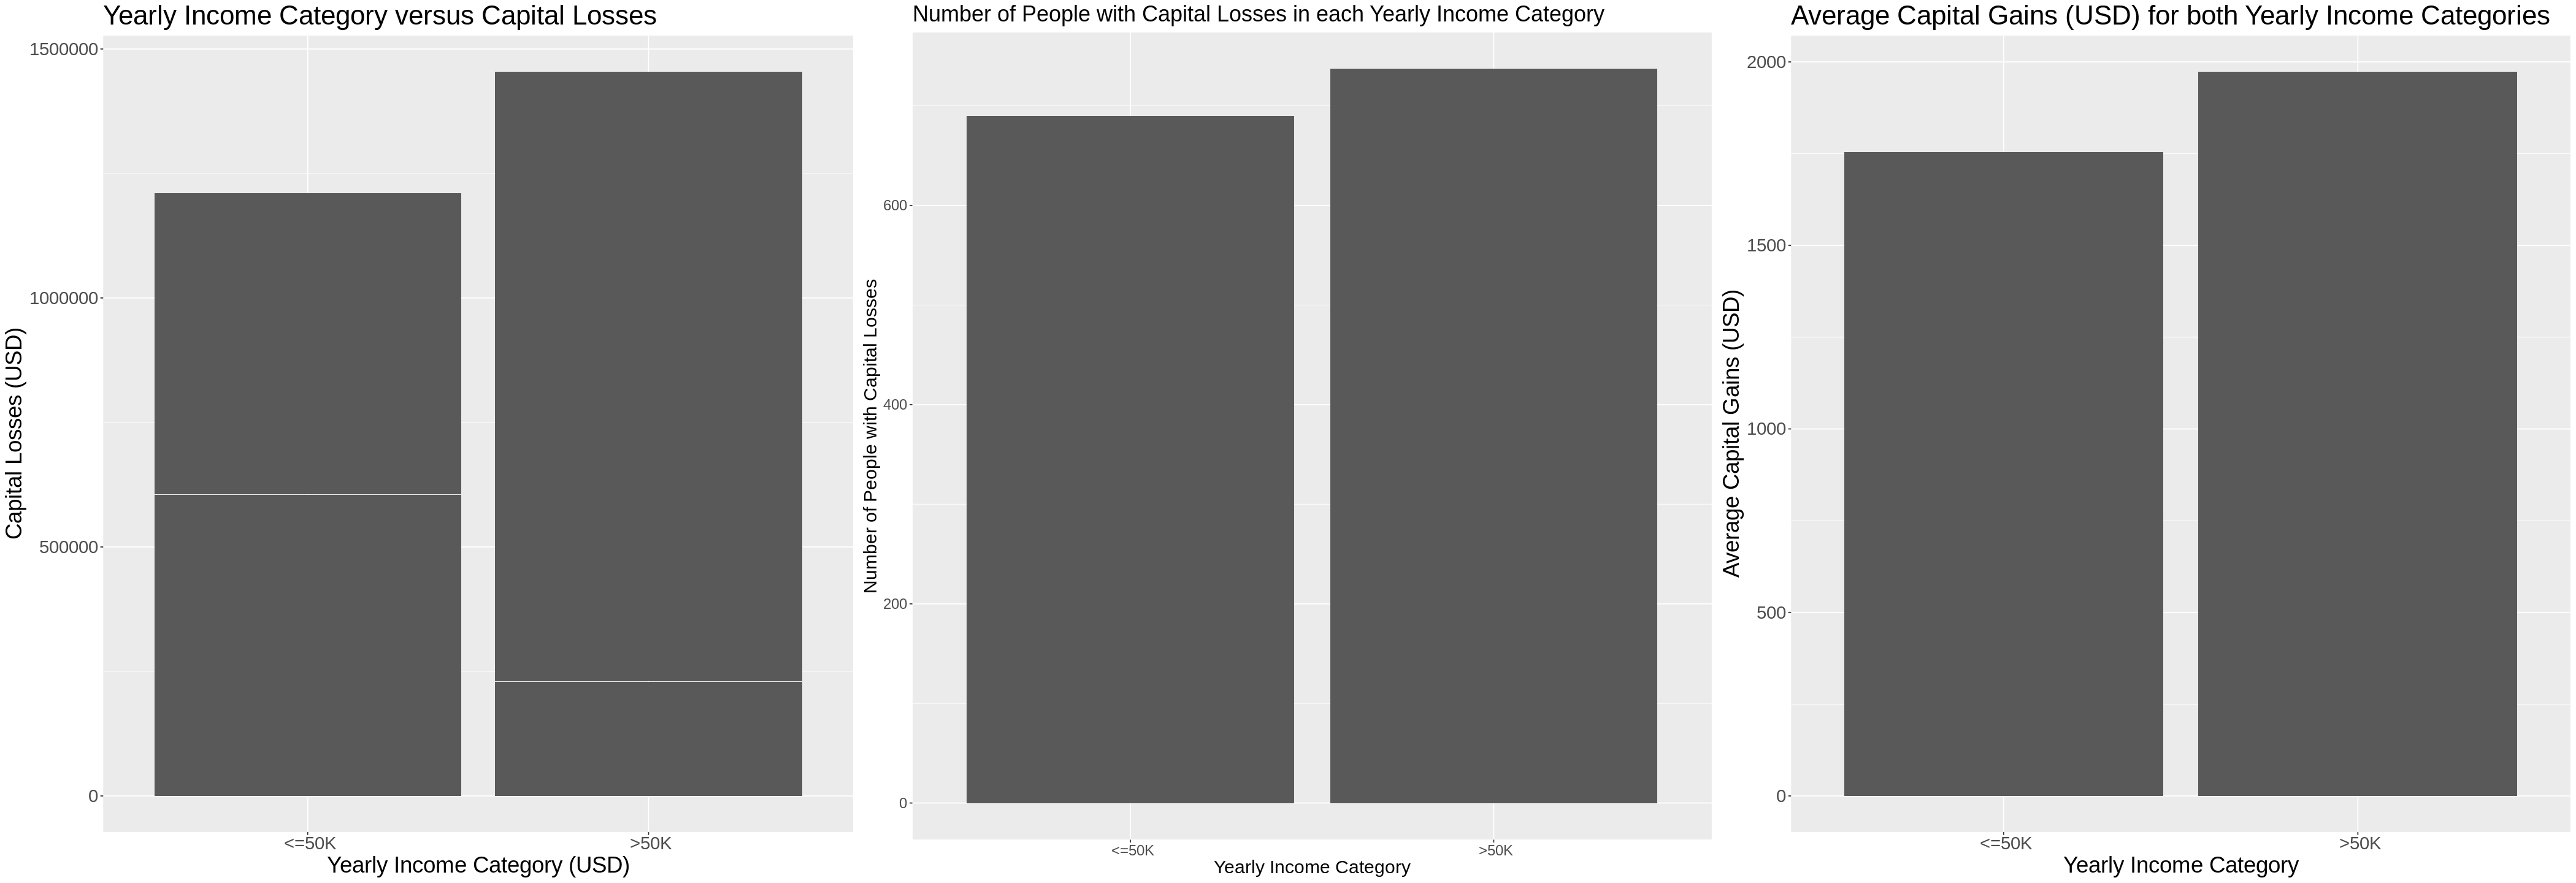

In [135]:
adult_average_cl <- adult_tidy %>%
    filter(capital_loss > 0) %>%
    group_by(label) %>%
    summarize(average_cl = mean(capital_loss))

options(repr.plot.width = 35, repr.plot.height = 12)
adult_cl_bar_1 <- adult_average_cl %>%
ggplot(aes(x = label, y = average_cl)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Capital Gains (USD)") +
    ggtitle("Average Capital Gains (USD) for both Yearly Income Categories") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cl_label, adult_cl_bar, adult_cl_bar_1, ncol=3)

`summarise()` ungrouping output (override with `.groups` argument)



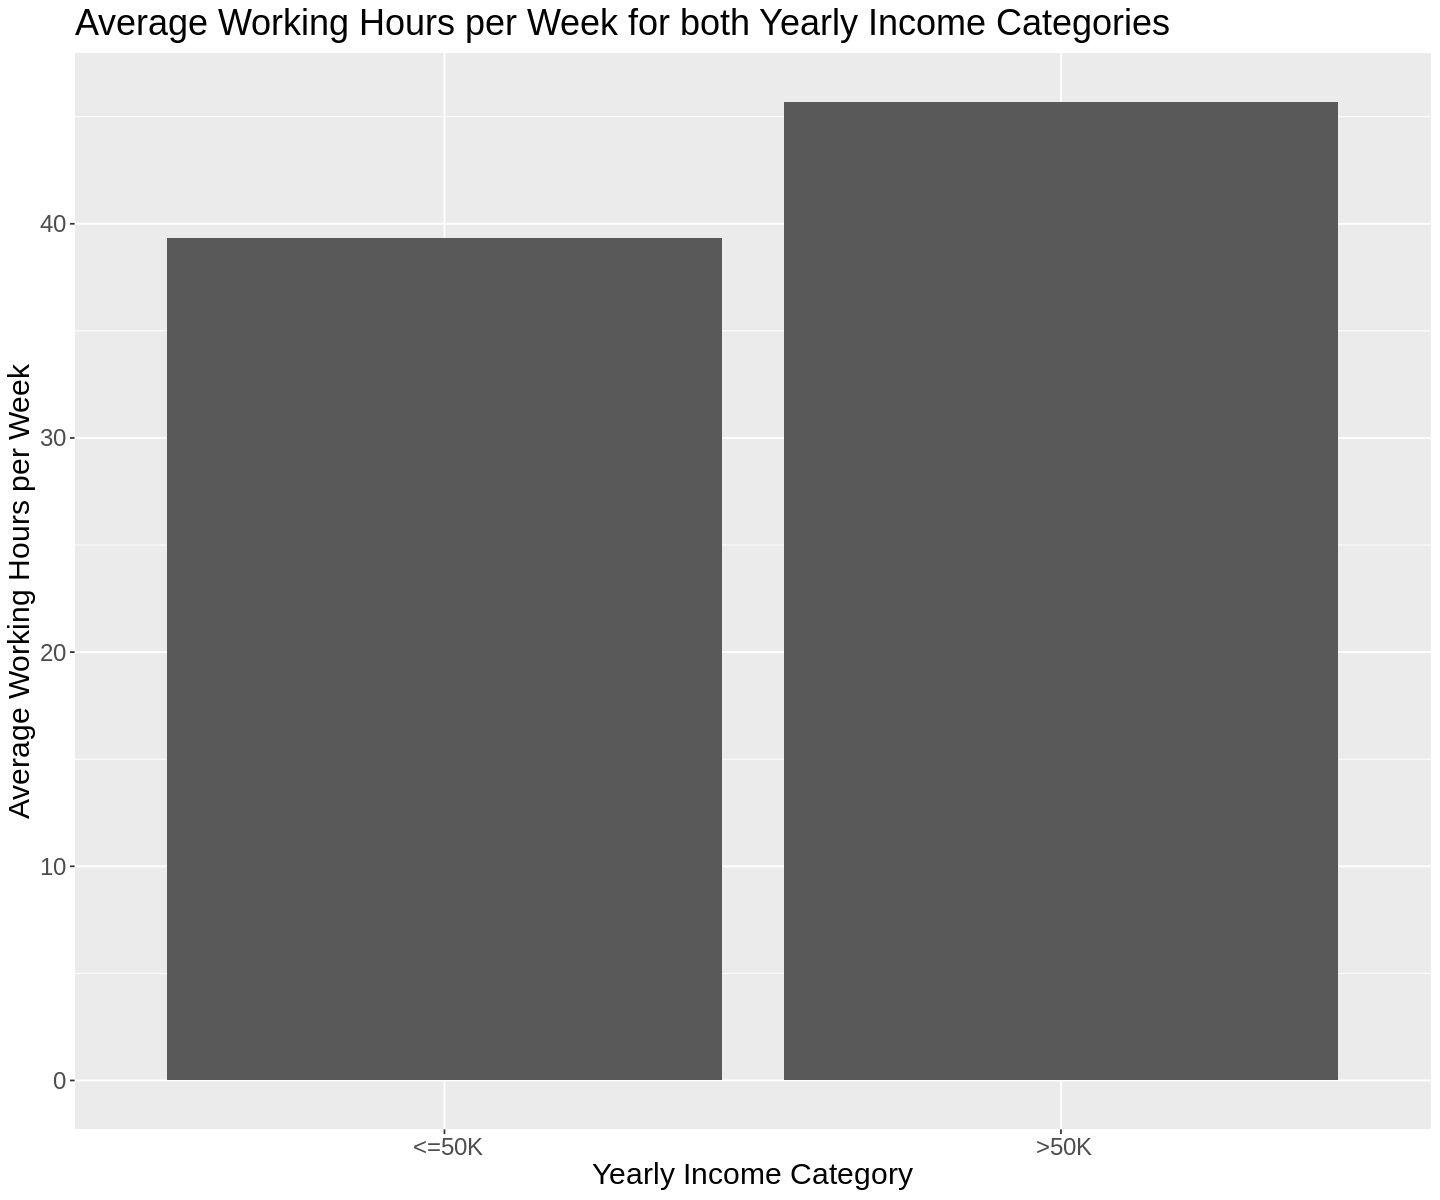

In [136]:
adult_average_wh <- adult_tidy %>%
    group_by(label) %>%
    summarize(average_wh = mean(hrs_per_week))

options(repr.plot.width = 12, repr.plot.height = 10)
adult_cl_bar_1 <- adult_average_wh %>%
ggplot(aes(x = label, y = average_wh)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Working Hours per Week") +
    ggtitle("Average Working Hours per Week for both Yearly Income Categories") +
    theme(text = element_text(size = 18))
adult_cl_bar_1

`summarise()` ungrouping output (override with `.groups` argument)



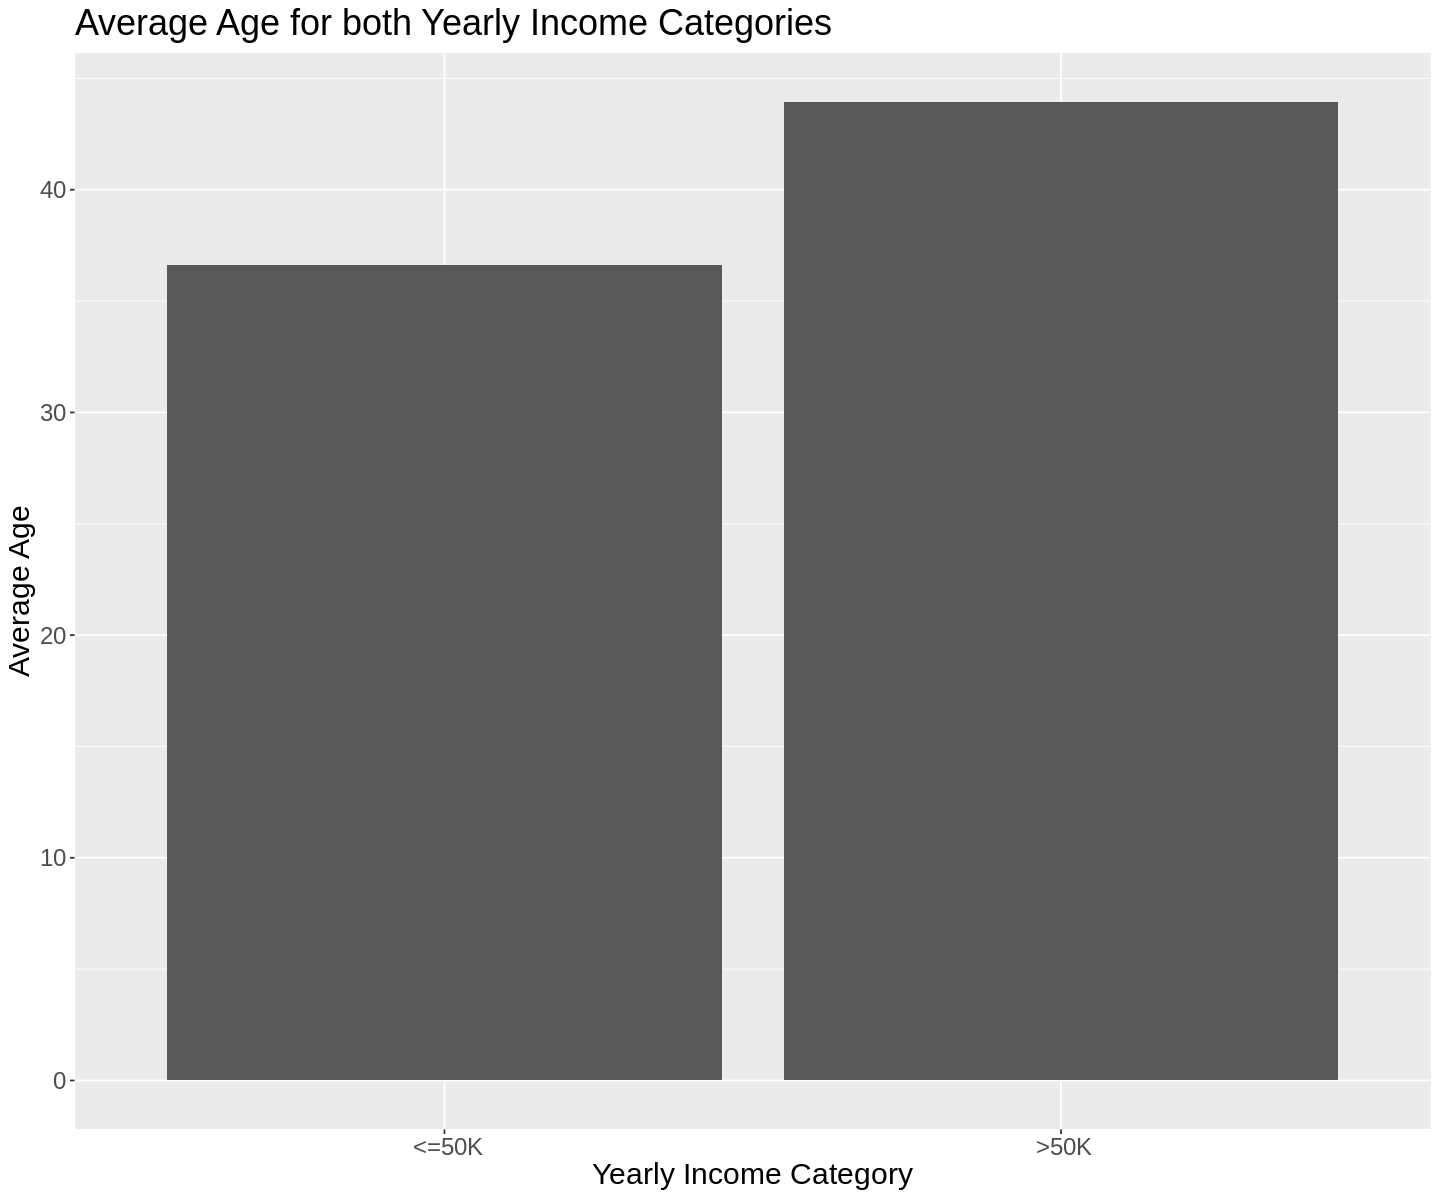

In [137]:
adult_average_age <- adult_tidy %>%
    group_by(label) %>%
    summarize(average_age = mean(age))

options(repr.plot.width = 12, repr.plot.height = 10)
adult_cl_bar_1 <- adult_average_age %>%
ggplot(aes(x = label, y = average_age)) + 
    geom_bar(stat = "identity") +
    labs(x = "Yearly Income Category", y = "Average Age") +
    ggtitle("Average Age for both Yearly Income Categories") +
    theme(text = element_text(size = 18))
adult_cl_bar_1

In [103]:
adult_cg_age <- adult_tidy %>%
ggplot(aes(x = age, y = capital_gain)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Age", y = "Capital Gains (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Age versus Capital Gains") +
    theme(text = element_text(size = 22))

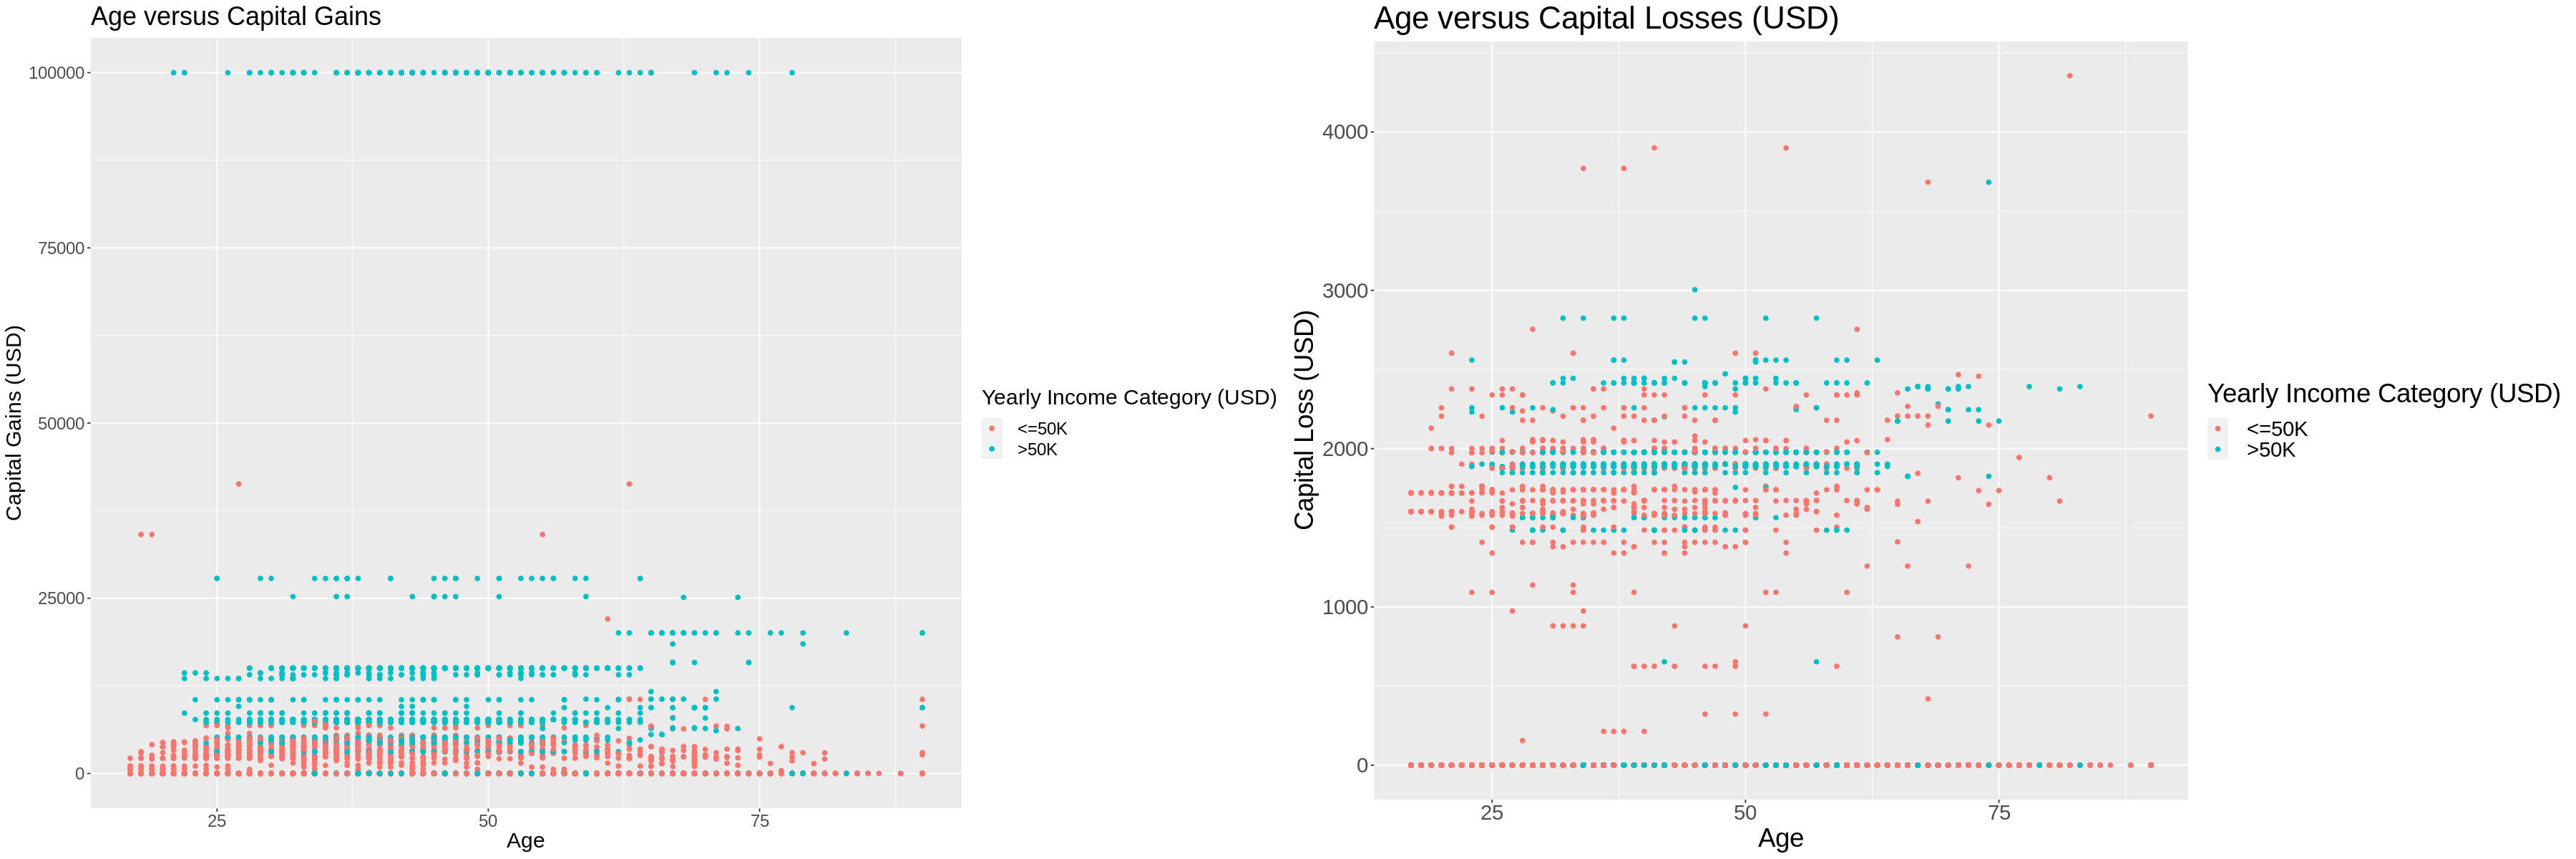

In [139]:
options(repr.plot.width = 30, repr.plot.height = 10)
adult_cl_age <- adult_tidy %>%
ggplot(aes(x = age, y = capital_loss)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Age", y = "Capital Loss (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Age versus Capital Losses (USD)") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cg_age, adult_cl_age, ncol=2)

In [141]:
adult_cg_wh <- adult_tidy %>%
ggplot(aes(x = hrs_per_week, y = capital_gain)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Working Hours per Week", y = "Capital Gains (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Working Hours per Week versus Capital Gains") +
    theme(text = element_text(size = 22))

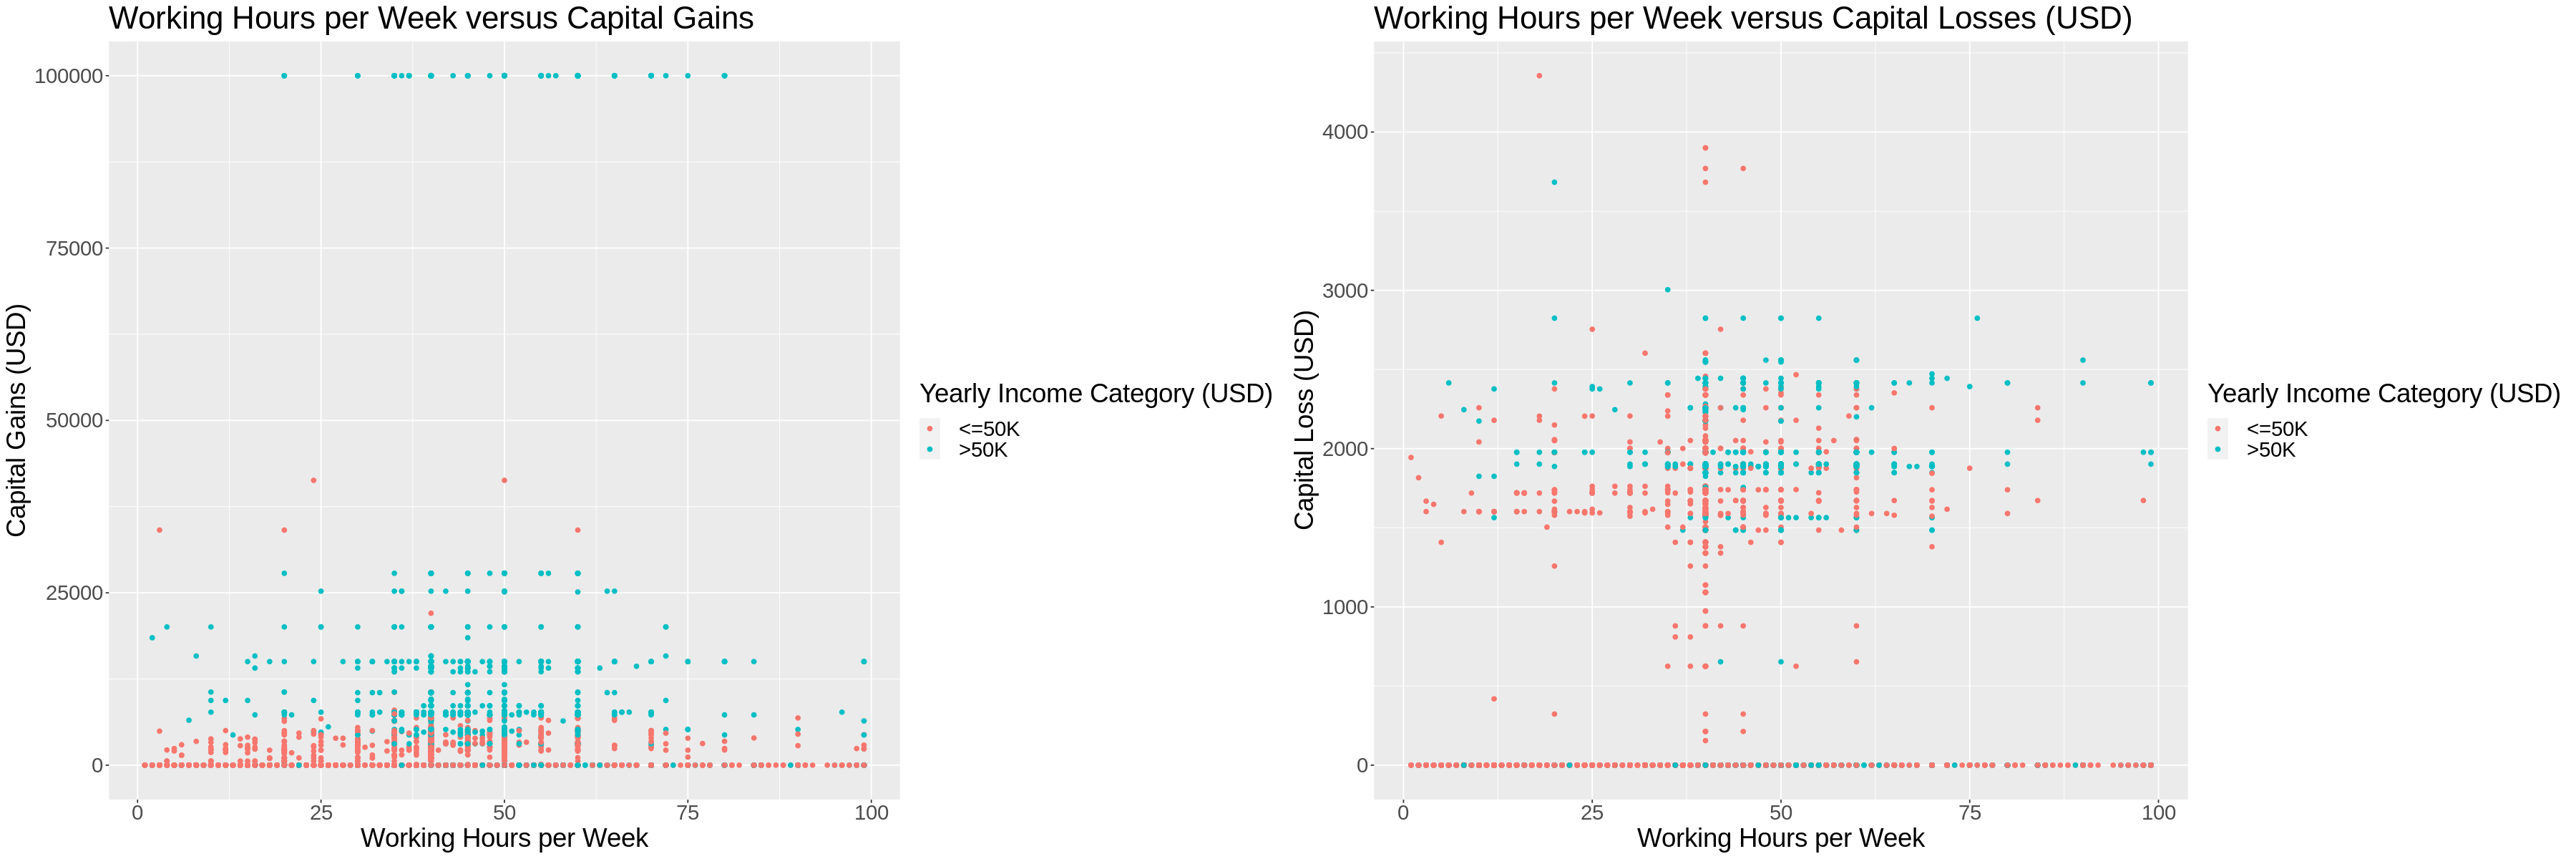

In [142]:
options(repr.plot.width = 30, repr.plot.height = 10)
adult_cl_wh <- adult_tidy %>%
ggplot(aes(x = hrs_per_week, y = capital_loss)) + 
    geom_point(aes(colour = label)) +
    labs(x = "Working Hours per Week", y = "Capital Loss (USD)", colour = "Yearly Income Category (USD)") +
    ggtitle("Working Hours per Week versus Capital Losses (USD)") +
    theme(text = element_text(size = 22))

grid.arrange(adult_cg_wh, adult_cl_wh, ncol=2)

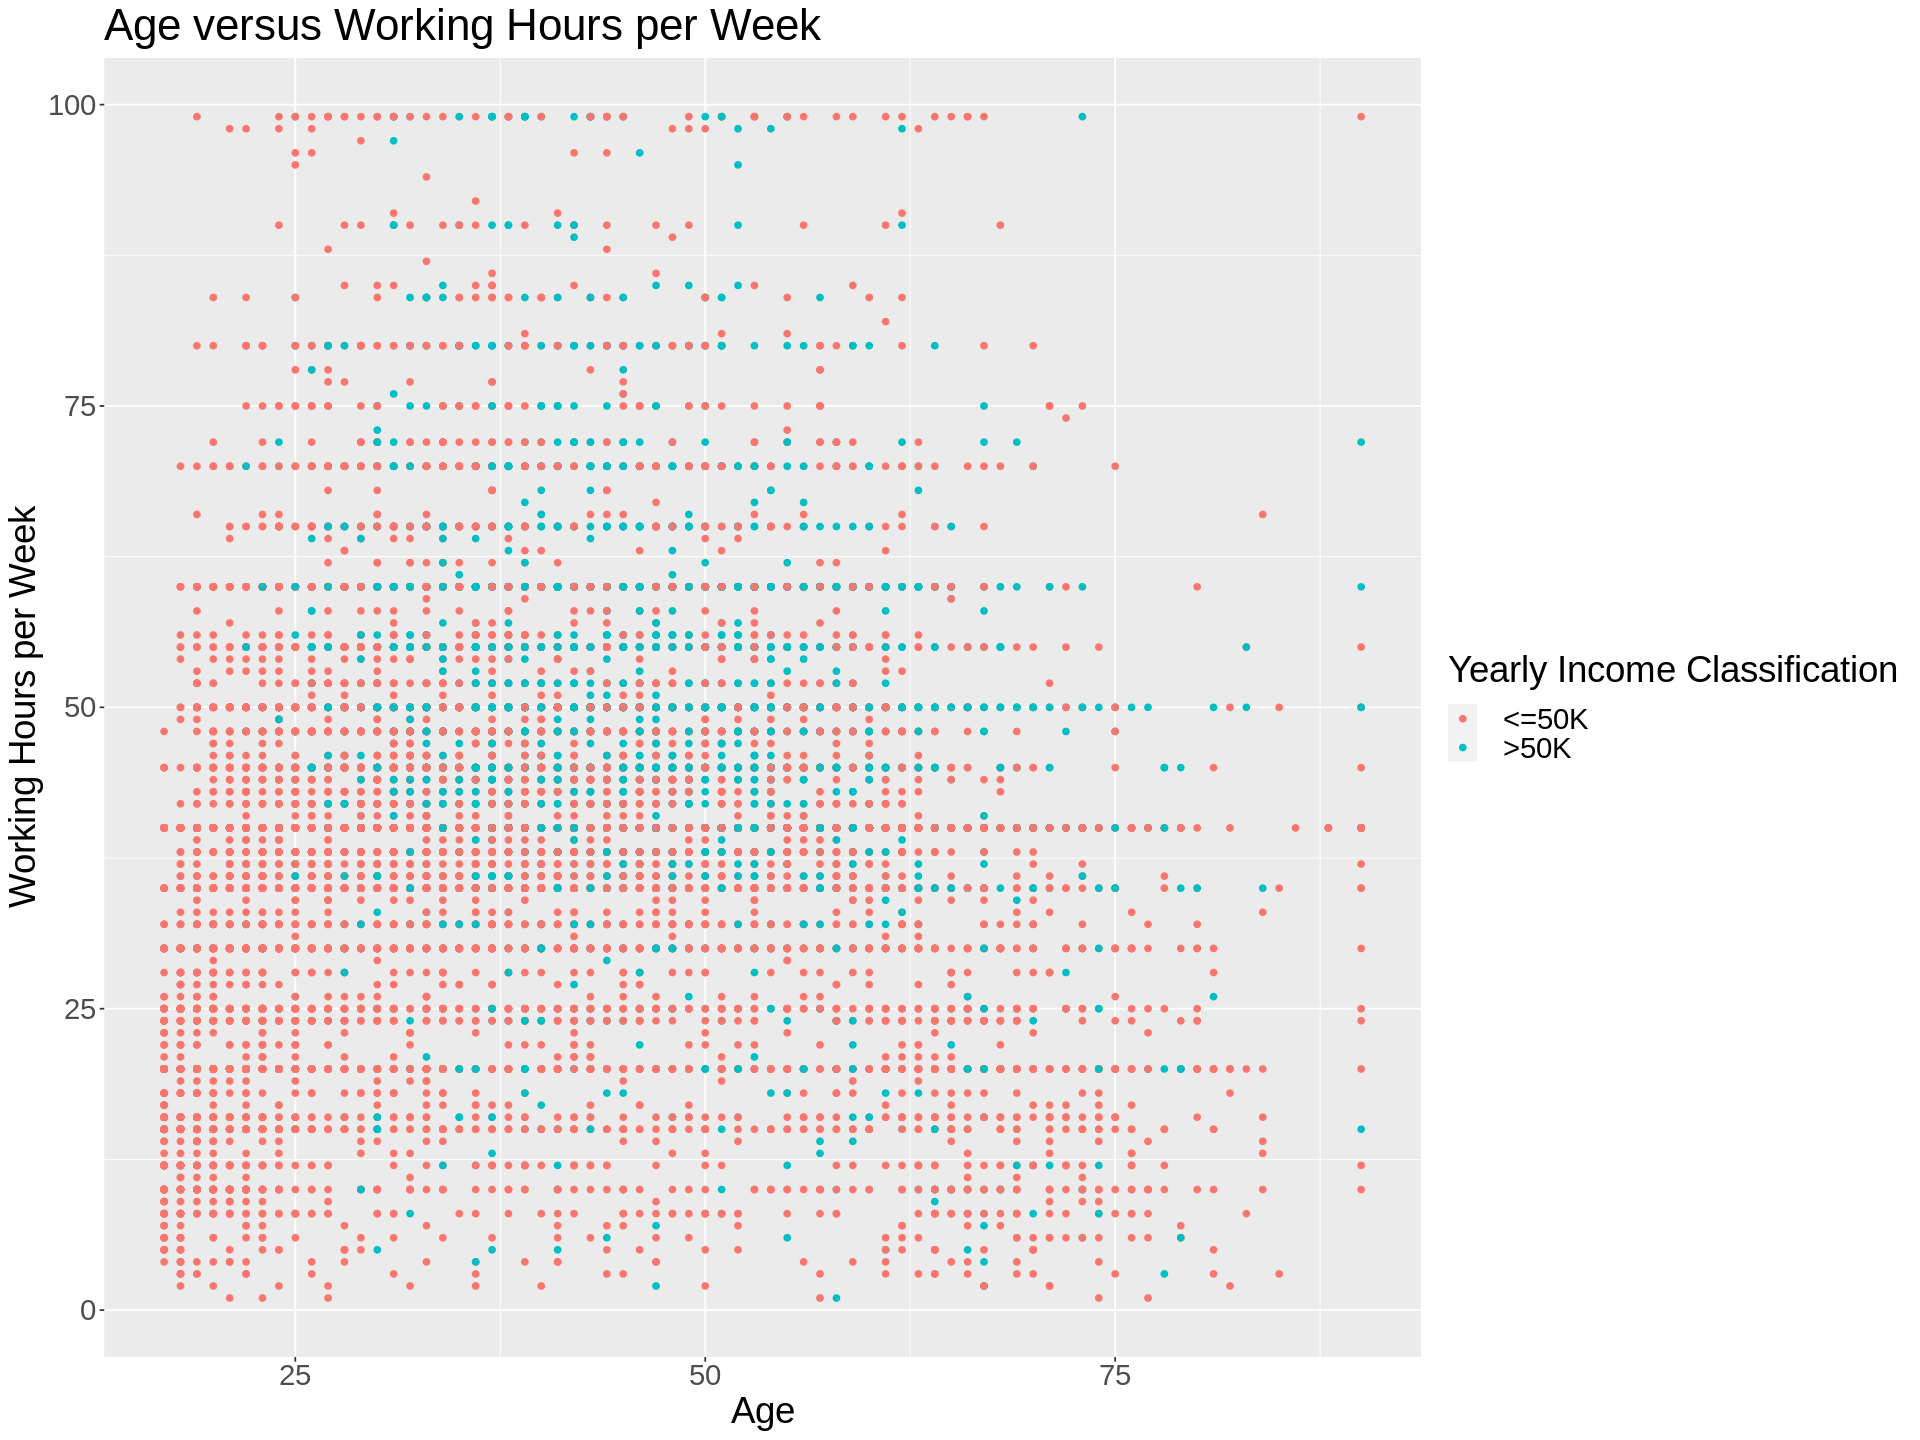

In [64]:
options(repr.plot.width = 16, repr.plot.height = 12)
adult_data_plot <- ggplot(adult_tidy, aes(x = age, y = hrs_per_week, colour = label)) +
    geom_point() +
    labs(x = "Age", y = "Working Hours per Week", colour = "Yearly Income Classification") +
    ggtitle("Age versus Working Hours per Week") +
    theme(text = element_text(size = 22))

adult_data_plot